# Final Project

Team 5: Mathia Quimpo, Matthew Chin

## Data Cleaning and Transformation

In [2]:
# import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
raw_df = pd.read_csv('https://github.com/mchin10/BSAN-6070/blob/main/Final%20Project/climate_change_data.csv?raw=true')
raw_df

Date           Location                Country  Temperature  \
0     00:00.0    New Williamtown                 Latvia    10.688986   
1     09:43.3       North Rachel           South Africa    13.814430   
2     19:26.5   West Williamland          French Guiana    27.323718   
3     29:09.8        South David                Vietnam    12.309581   
4     38:53.0     New Scottburgh                Moldova    13.210885   
...       ...                ...                    ...          ...   
9995  21:07.0   South Elaineberg                 Bhutan    15.020523   
9996  30:50.2       Leblancville                  Congo    16.772451   
9997  40:33.5     West Stephanie              Argentina    22.370025   
9998  50:16.7        Port Steven                Albania    19.430853   
9999  00:00.0  West Anthonyburgh  Sao Tome and Principe    12.661928   

      CO2 Emissions  Sea Level Rise  Precipitation   Humidity  Wind Speed  
0        403.118902        0.717506      13.835237  23.631256   18.492026  
1        396.663499        1.205715      40.974084  43.982946   34.249300  
2        451.553155       -0.160783      42.697931  96.652600   34.124261  
3        422.404984       -0.475931       5.193341  47.467938    8.554563  
4        410.472999        1.135757      78.695280  61.789672    8.001164  
...             ...             ...            ...        ...         ...  
9995     391.379537       -1.452243      93.417109  25.293814    6.531866  
9996     346.921190        0.543616      49.882947  96.787402   42.249014  
9997     466.042136        1.026704      30.659841  15.211825   18.293708  
9998     337.899776       -0.895329      18.932275  82.774520   42.424255  
9999     381.172746        2.260788      78.339658  99.243923   41.856539  

[10000 rows x 9 columns]

In [4]:
# get information
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


In [5]:
raw_df.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [6]:
raw_df.duplicated().sum()

0

In [7]:
oh_encoder = OneHotEncoder()
oe_encoded_countries = oh_encoder.fit_transform(raw_df[["Country"]])
# Get the feature names after one-hot encoding
encoded_columns = oh_encoder.get_feature_names_out(["Country"])
# Create a DataFrame with the encoded data and updated column labels
ohe_df = pd.DataFrame(oe_encoded_countries.toarray(), columns=encoded_columns)
ohe_df

Country_Afghanistan  Country_Albania  Country_Algeria  \
0                     0.0              0.0              0.0   
1                     0.0              0.0              0.0   
2                     0.0              0.0              0.0   
3                     0.0              0.0              0.0   
4                     0.0              0.0              0.0   
...                   ...              ...              ...   
9995                  0.0              0.0              0.0   
9996                  0.0              0.0              0.0   
9997                  0.0              0.0              0.0   
9998                  0.0              1.0              0.0   
9999                  0.0              0.0              0.0   

      Country_American Samoa  Country_Andorra  Country_Angola  \
0                        0.0              0.0             0.0   
1                        0.0              0.0             0.0   
2                        0.0              0.0             0.0   
3                        0.0              0.0             0.0   
4                        0.0              0.0             0.0   
...                      ...              ...             ...   
9995                     0.0              0.0             0.0   
9996                     0.0              0.0             0.0   
9997                     0.0              0.0             0.0   
9998                     0.0              0.0             0.0   
9999                     0.0              0.0             0.0   

      Country_Anguilla  Country_Antarctica (the territory South of 60 deg S)  \
0                  0.0                                                0.0      
1                  0.0                                                0.0      
2                  0.0                                                0.0      
3                  0.0                                                0.0      
4                  0.0                                                0.0      
...                ...                                                ...      
9995               0.0                                                0.0      
9996               0.0                                                0.0      
9997               0.0                                                0.0      
9998               0.0                                                0.0      
9999               0.0                                                0.0      

      Country_Antigua and Barbuda  Country_Argentina  ...  Country_Uruguay  \
0                             0.0                0.0  ...              0.0   
1                             0.0                0.0  ...              0.0   
2                             0.0                0.0  ...              0.0   
3                             0.0                0.0  ...              0.0   
4                             0.0                0.0  ...              0.0   
...                           ...                ...  ...              ...   
9995                          0.0                0.0  ...              0.0   
9996                          0.0                0.0  ...              0.0   
9997                          0.0                1.0  ...              0.0   
9998                          0.0                0.0  ...              0.0   
9999                          0.0                0.0  ...              0.0   

      Country_Uzbekistan  Country_Vanuatu  Country_Venezuela  Country_Vietnam  \
0                    0.0              0.0                0.0              0.0   
1                    0.0              0.0                0.0              0.0   
2                    0.0              0.0                0.0              0.0   
3                    0.0              0.0                0.0              1.0   
4                    0.0              0.0                0.0              0.0   
...                  ...              ...                ...              ...   
999

In [8]:
# drop columns
raw_df.drop(columns=['Date', 'Location', 'Country'], inplace=True)

In [9]:
# merge dataframes horizontally
df = pd.concat([raw_df, ohe_df], axis=1)
df.columns = ["".join(col) for col in df.columns]
df

Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0       10.688986     403.118902        0.717506      13.835237  23.631256   
1       13.814430     396.663499        1.205715      40.974084  43.982946   
2       27.323718     451.553155       -0.160783      42.697931  96.652600   
3       12.309581     422.404984       -0.475931       5.193341  47.467938   
4       13.210885     410.472999        1.135757      78.695280  61.789672   
...           ...            ...             ...            ...        ...   
9995    15.020523     391.379537       -1.452243      93.417109  25.293814   
9996    16.772451     346.921190        0.543616      49.882947  96.787402   
9997    22.370025     466.042136        1.026704      30.659841  15.211825   
9998    19.430853     337.899776       -0.895329      18.932275  82.774520   
9999    12.661928     381.172746        2.260788      78.339658  99.243923   

      Wind Speed  Country_Afghanistan  Country_Albania  Country_Algeria  \
0      18.492026                  0.0              0.0              0.0   
1      34.249300                  0.0              0.0              0.0   
2      34.124261                  0.0              0.0              0.0   
3       8.554563                  0.0              0.0              0.0   
4       8.001164                  0.0              0.0              0.0   
...          ...                  ...              ...              ...   
9995    6.531866                  0.0              0.0              0.0   
9996   42.249014                  0.0              0.0              0.0   
9997   18.293708                  0.0              0.0              0.0   
9998   42.424255                  0.0              1.0              0.0   
9999   41.856539                  0.0              0.0              0.0   

      Country_American Samoa  ...  Country_Uruguay  Country_Uzbekistan  \
0                        0.0  ...              0.0                 0.0   
1                        0.0  ...              0.0                 0.0   
2                        0.0  ...              0.0                 0.0   
3                        0.0  ...              0.0                 0.0   
4                        0.0  ...              0.0                 0.0   
...                      ...  ...              ...                 ...   
9995                     0.0  ...              0.0                 0.0   
9996                     0.0  ...              0.0                 0.0   
9997                     0.0  ...              0.0                 0.0   
9998                     0.0  ...              0.0                 0.0   
9999                     0.0  ...              0.0                 0.0   

      Country_Vanuatu  Country_Venezuela  Country_Vietnam  \
0                 0.0                0.0              0.0   
1                 0.0                0.0              0.0   
2                 0.0                0.0              0.0   
3                 0.0                0.0              1.0   
4                 0.0                0.0              0.0   
...               ...                ...              ...   
9995              0.0                0.0              0.0   
9996              0.0                0.0              0.0   
9997              0.0                0.0              0.0   
9998              0.0                0.0              0.0   
9999              0.0                0.0              0.0   

      Country_Wallis and Futuna  Country_Western Sahara  Country_Yemen  \
0                           0.0                     0.0            0.0   
1                           0.0                     0.0            0.0   
2                           0.0                     0.0            0.0   
3                           0.0                     0.0            0.0   
4                           0.0                     0.0            0.0   
...                         ...                     ...            ...   
9995                        

In [10]:
raw_df.head()

Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0    10.688986     403.118902        0.717506      13.835237  23.631256   
1    13.814430     396.663499        1.205715      40.974084  43.982946   
2    27.323718     451.553155       -0.160783      42.697931  96.652600   
3    12.309581     422.404984       -0.475931       5.193341  47.467938   
4    13.210885     410.472999        1.135757      78.695280  61.789672   

   Wind Speed  
0   18.492026  
1   34.249300  
2   34.124261  
3    8.554563  
4    8.001164

In [11]:
raw_df.describe()

Temperature  CO2 Emissions  Sea Level Rise  Precipitation  \
count  10000.000000   10000.000000    10000.000000   10000.000000   
mean      14.936034     400.220469       -0.003152      49.881208   
std        5.030616      49.696933        0.991349      28.862417   
min       -3.803589     182.131220       -4.092155       0.010143   
25%       11.577991     367.109330       -0.673809      24.497516   
50%       14.981136     400.821324        0.002332      49.818967   
75%       18.305826     433.307905        0.675723      74.524991   
max       33.976956     582.899701        4.116559      99.991900   

           Humidity    Wind Speed  
count  10000.000000  10000.000000  
mean      49.771302     25.082066  
std       28.929320     14.466648  
min        0.018998      0.001732  
25%       24.713250     12.539733  
50%       49.678412     24.910787  
75%       75.206390     37.670260  
max       99.959665     49.997664

## Data Exploration

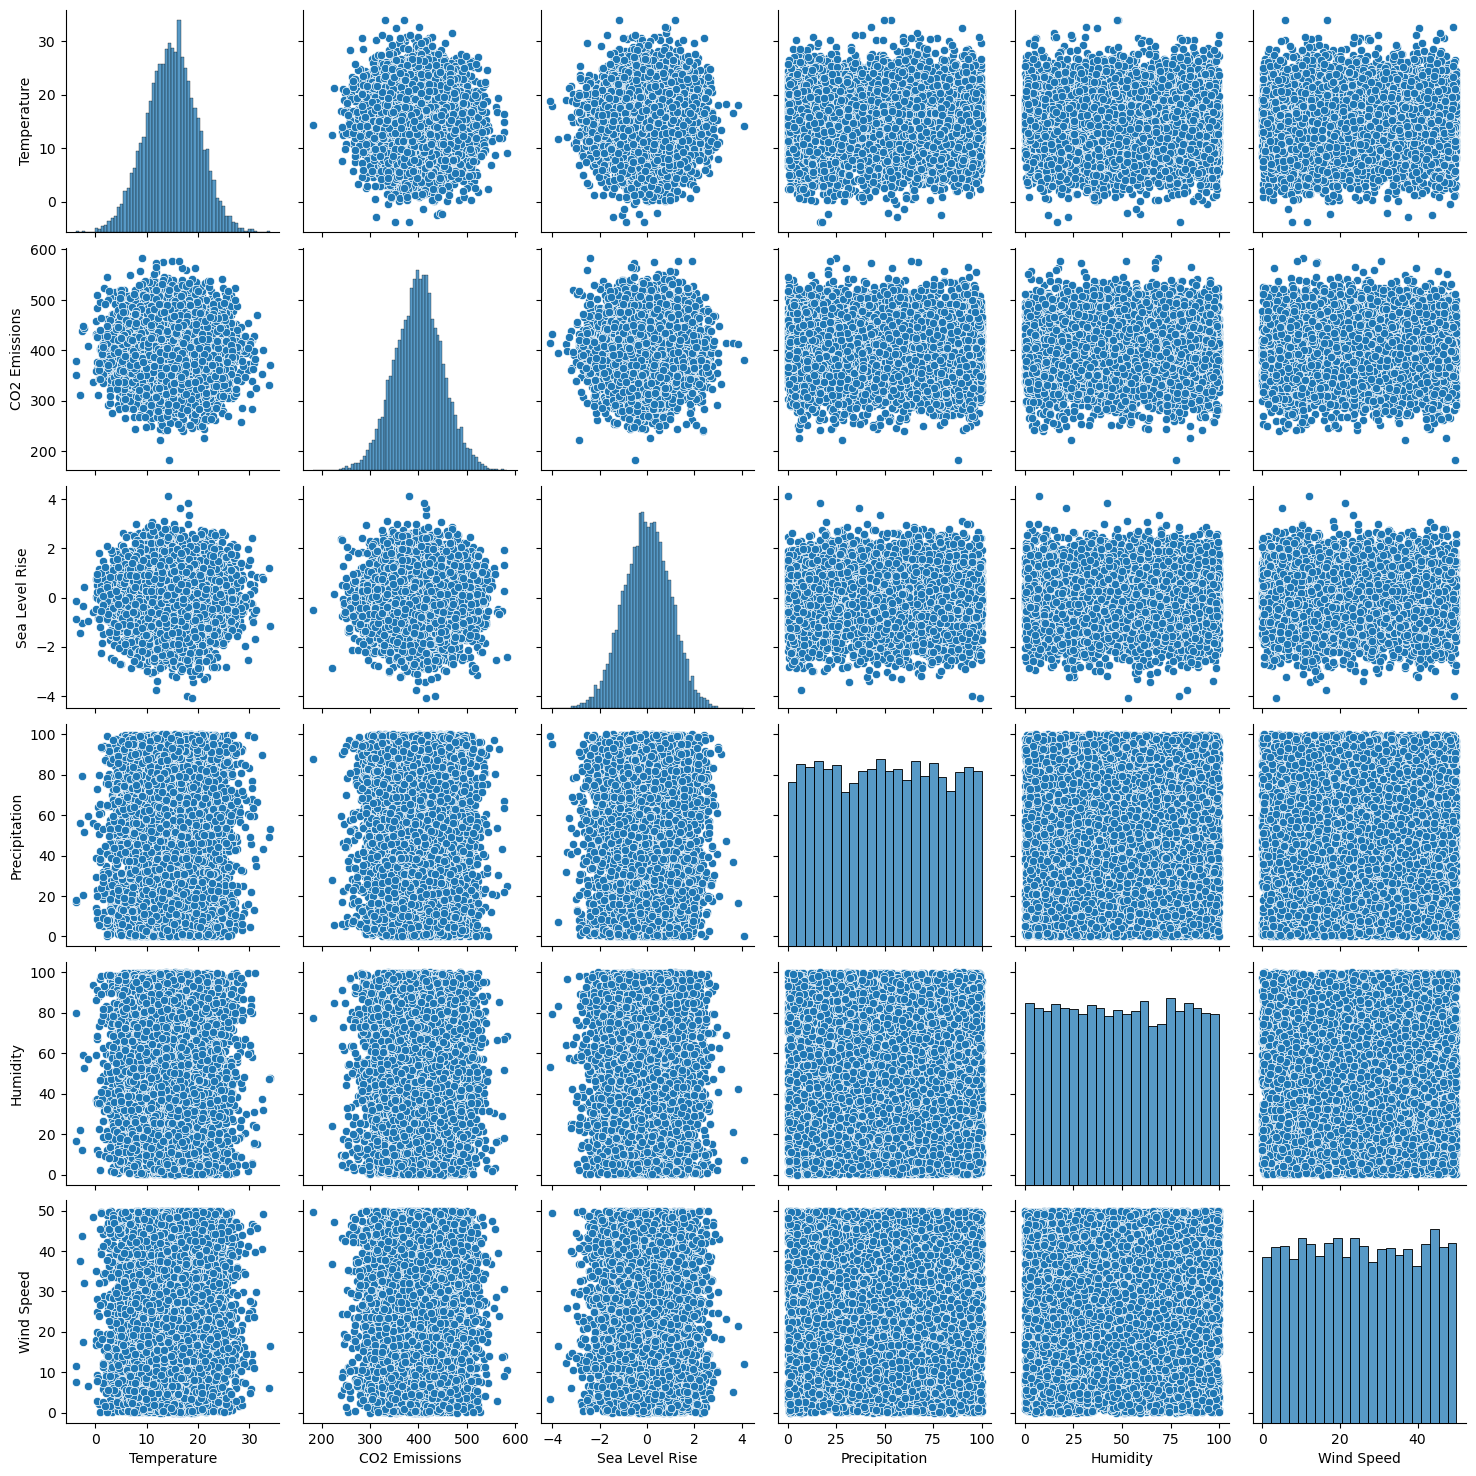

In [12]:
sns.pairplot(raw_df)

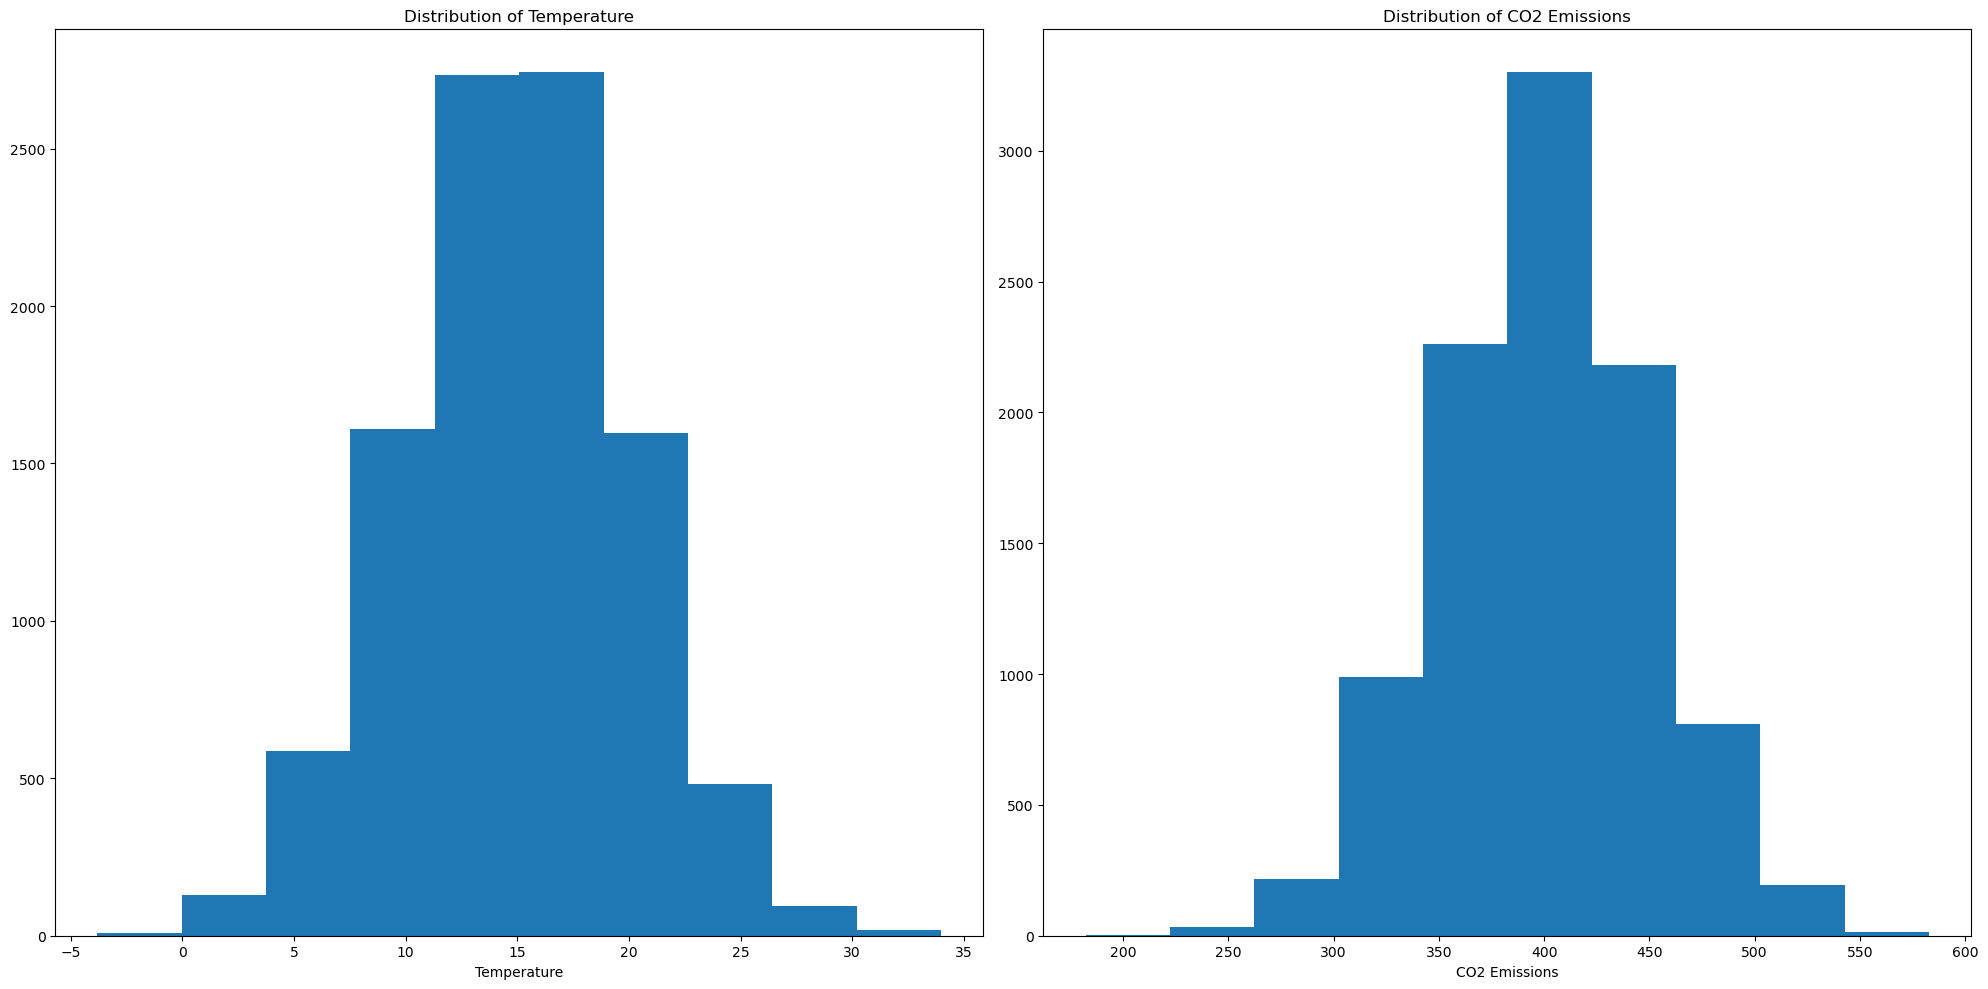

In [13]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Histogram for Temperature
axes[0].hist(raw_df['Temperature'])
axes[0].set_xlabel('Temperature')
axes[0].set_title('Distribution of Temperature')

# Histogram for CO2 Emissions
axes[1].hist(raw_df['CO2 Emissions'])
axes[1].set_xlabel('CO2 Emissions')
axes[1].set_title('Distribution of CO2 Emissions')

plt.tight_layout()
plt.show()

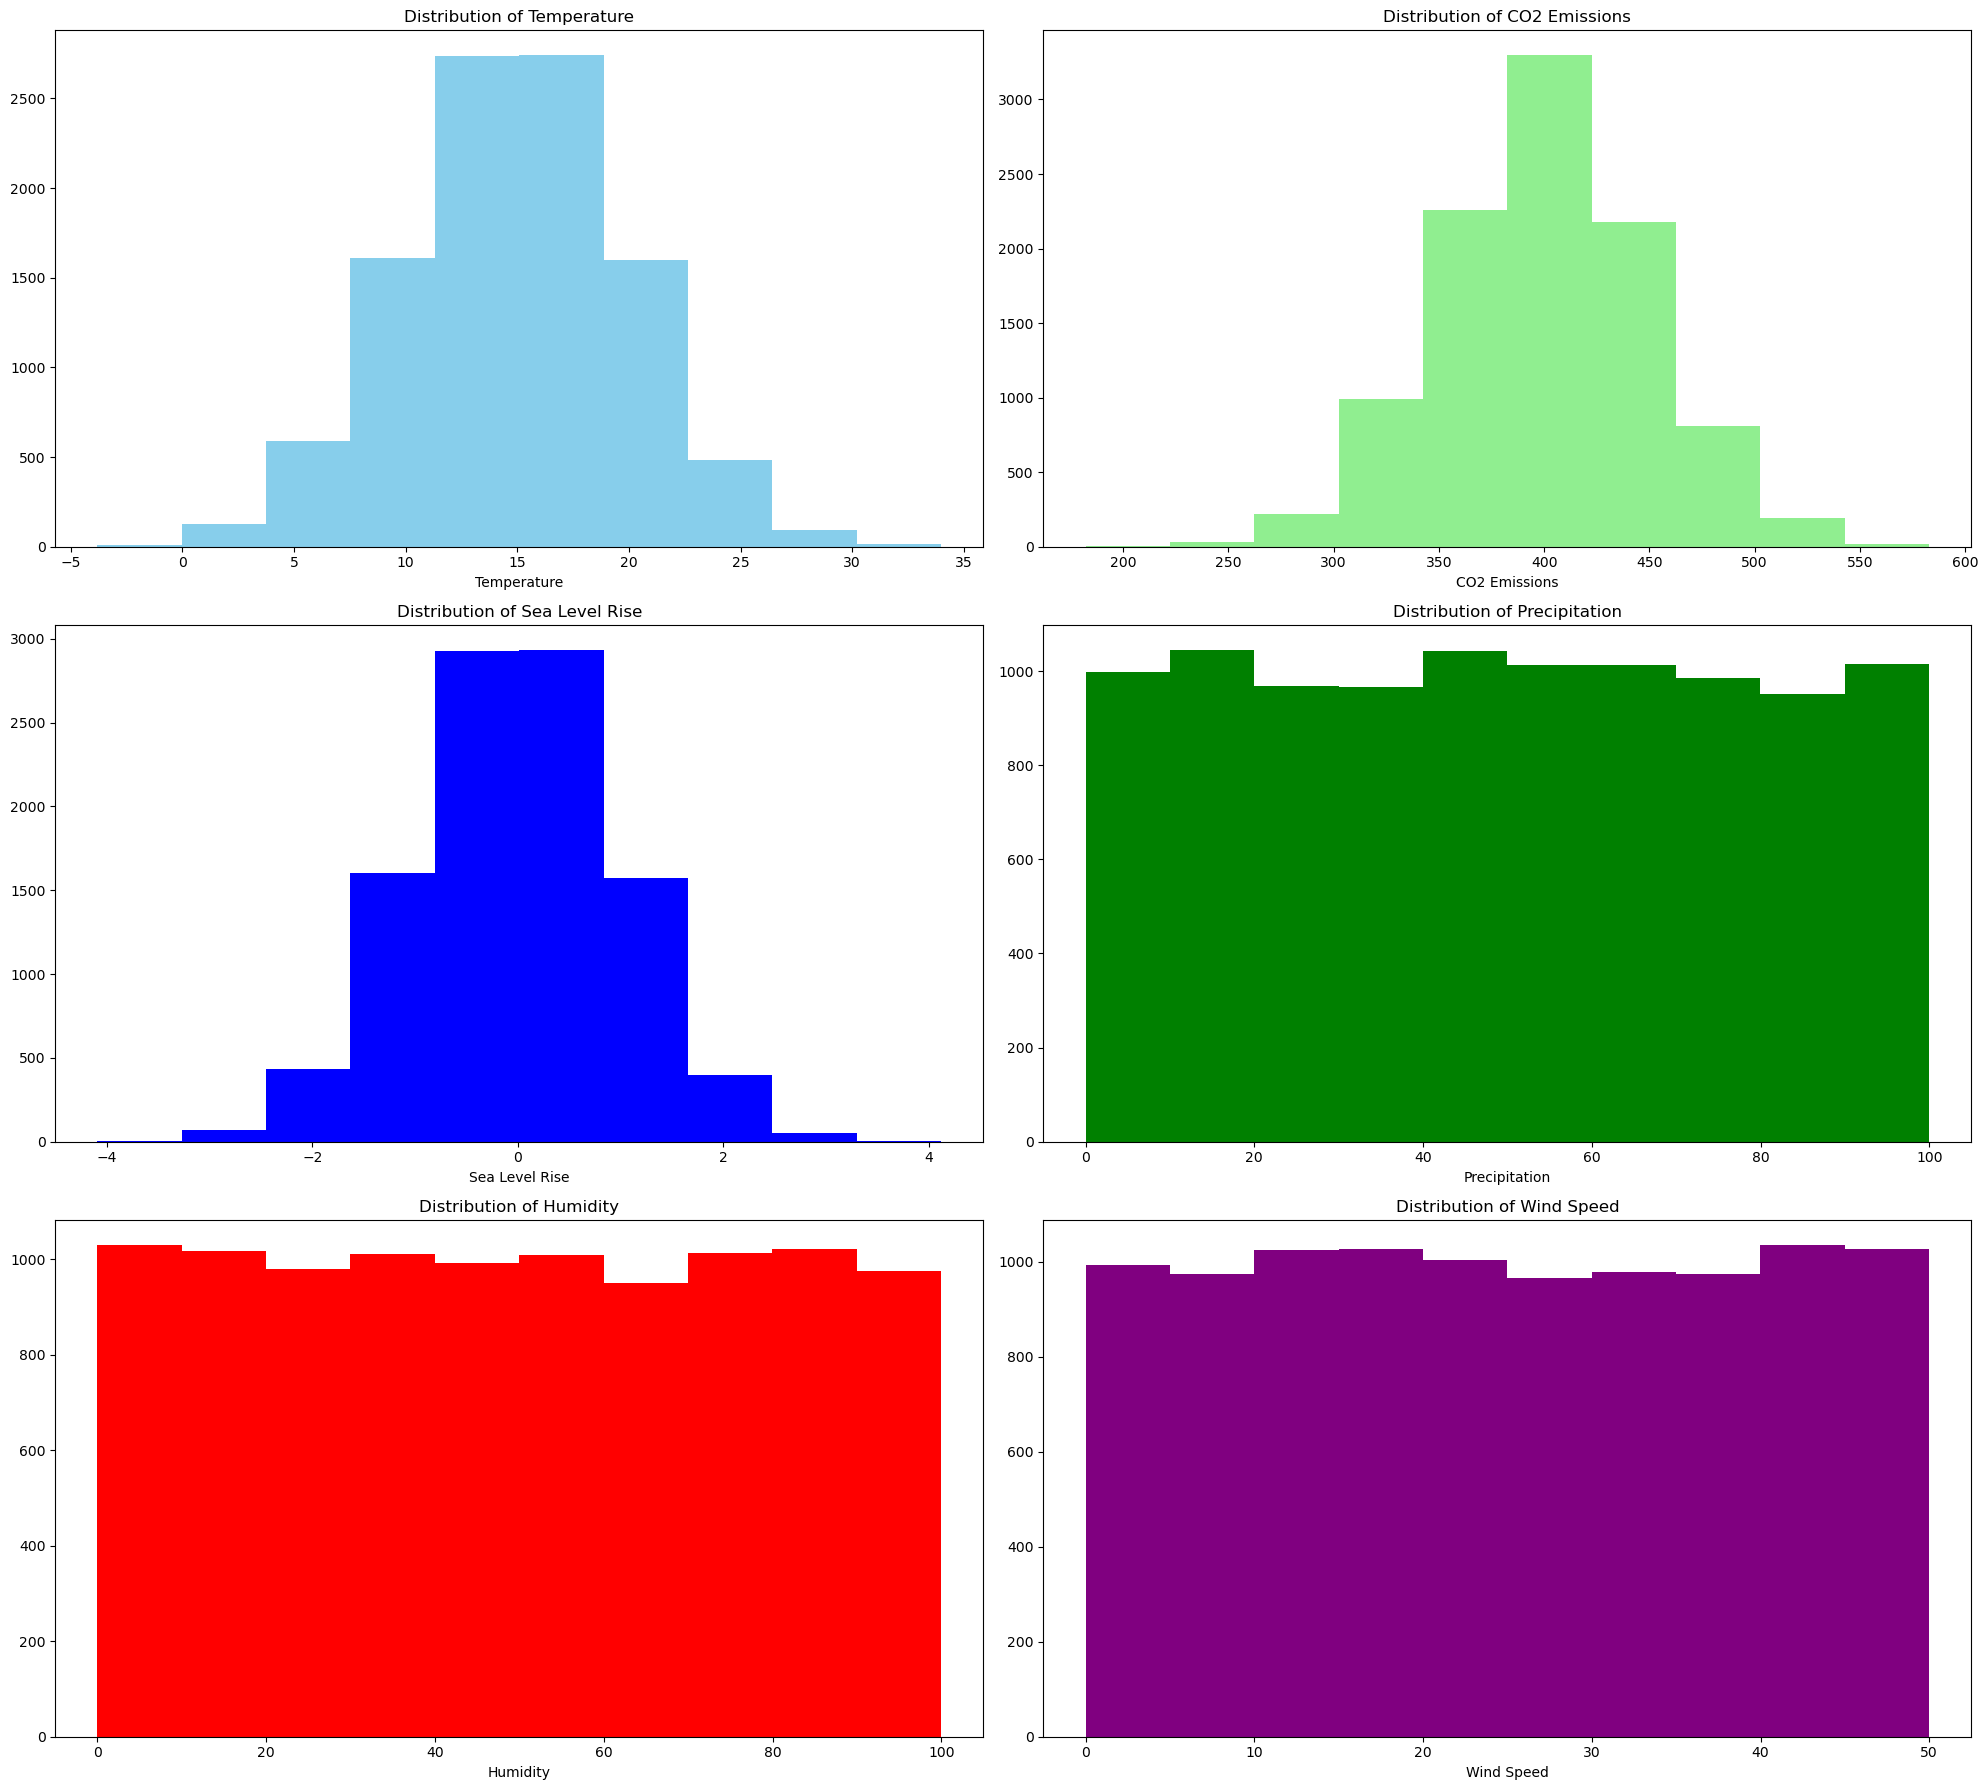

In [14]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))

# Histogram for Temperature
axes[0, 0].hist(raw_df['Temperature'], color='skyblue')
axes[0, 0].set_xlabel('Temperature')
axes[0, 0].set_title('Distribution of Temperature')

# Histogram for CO2 Emissions
axes[0, 1].hist(raw_df['CO2 Emissions'], color='lightgreen')
axes[0, 1].set_xlabel('CO2 Emissions')
axes[0, 1].set_title('Distribution of CO2 Emissions')

# Histogram for Sea Level Rise
axes[1, 0].hist(raw_df['Sea Level Rise'], color='blue')
axes[1, 0].set_xlabel('Sea Level Rise')
axes[1, 0].set_title('Distribution of Sea Level Rise')

# Histogram for Precipitation
axes[1, 1].hist(raw_df['Precipitation'], color='green')
axes[1, 1].set_xlabel('Precipitation')
axes[1, 1].set_title('Distribution of Precipitation')

# Histogram for Humidity
axes[2, 0].hist(raw_df['Humidity'], color='red')
axes[2, 0].set_xlabel('Humidity')
axes[2, 0].set_title('Distribution of Humidity')

# Histogram for Wind Speed
axes[2, 1].hist(raw_df['Wind Speed'], color='purple')
axes[2, 1].set_xlabel('Wind Speed')
axes[2, 1].set_title('Distribution of Wind Speed')

plt.tight_layout()
plt.show()

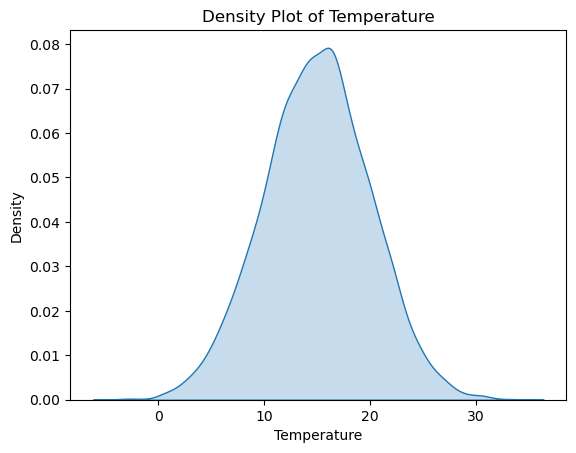

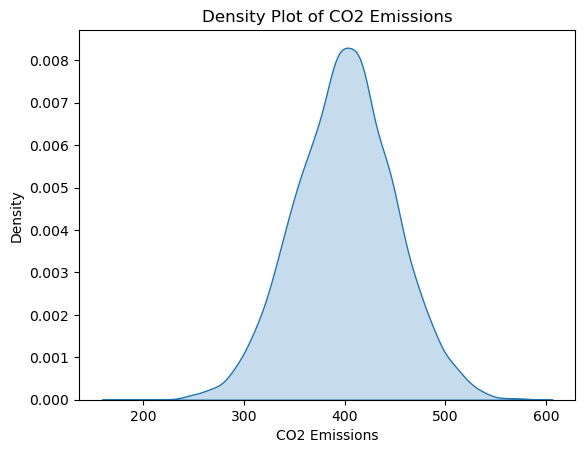

In [15]:
sns.kdeplot(data=raw_df, x='Temperature', fill=True)
plt.title('Density Plot of Temperature')
plt.show()

sns.kdeplot(data=raw_df, x='CO2 Emissions', fill=True)
plt.title('Density Plot of CO2 Emissions')
plt.show()

In [16]:
# merge dataframes horizontally
df = pd.concat([raw_df, ohe_df], axis=1)
df.columns = ["".join(col) for col in df.columns]
df

Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0       10.688986     403.118902        0.717506      13.835237  23.631256   
1       13.814430     396.663499        1.205715      40.974084  43.982946   
2       27.323718     451.553155       -0.160783      42.697931  96.652600   
3       12.309581     422.404984       -0.475931       5.193341  47.467938   
4       13.210885     410.472999        1.135757      78.695280  61.789672   
...           ...            ...             ...            ...        ...   
9995    15.020523     391.379537       -1.452243      93.417109  25.293814   
9996    16.772451     346.921190        0.543616      49.882947  96.787402   
9997    22.370025     466.042136        1.026704      30.659841  15.211825   
9998    19.430853     337.899776       -0.895329      18.932275  82.774520   
9999    12.661928     381.172746        2.260788      78.339658  99.243923   

      Wind Speed  Country_Afghanistan  Country_Albania  Country_Algeria  \
0      18.492026                  0.0              0.0              0.0   
1      34.249300                  0.0              0.0              0.0   
2      34.124261                  0.0              0.0              0.0   
3       8.554563                  0.0              0.0              0.0   
4       8.001164                  0.0              0.0              0.0   
...          ...                  ...              ...              ...   
9995    6.531866                  0.0              0.0              0.0   
9996   42.249014                  0.0              0.0              0.0   
9997   18.293708                  0.0              0.0              0.0   
9998   42.424255                  0.0              1.0              0.0   
9999   41.856539                  0.0              0.0              0.0   

      Country_American Samoa  ...  Country_Uruguay  Country_Uzbekistan  \
0                        0.0  ...              0.0                 0.0   
1                        0.0  ...              0.0                 0.0   
2                        0.0  ...              0.0                 0.0   
3                        0.0  ...              0.0                 0.0   
4                        0.0  ...              0.0                 0.0   
...                      ...  ...              ...                 ...   
9995                     0.0  ...              0.0                 0.0   
9996                     0.0  ...              0.0                 0.0   
9997                     0.0  ...              0.0                 0.0   
9998                     0.0  ...              0.0                 0.0   
9999                     0.0  ...              0.0                 0.0   

      Country_Vanuatu  Country_Venezuela  Country_Vietnam  \
0                 0.0                0.0              0.0   
1                 0.0                0.0              0.0   
2                 0.0                0.0              0.0   
3                 0.0                0.0              1.0   
4                 0.0                0.0              0.0   
...               ...                ...              ...   
9995              0.0                0.0              0.0   
9996              0.0                0.0              0.0   
9997              0.0                0.0              0.0   
9998              0.0                0.0              0.0   
9999              0.0                0.0              0.0   

      Country_Wallis and Futuna  Country_Western Sahara  Country_Yemen  \
0                           0.0                     0.0            0.0   
1                           0.0                     0.0            0.0   
2                           0.0                     0.0            0.0   
3                           0.0                     0.0            0.0   
4                           0.0                     0.0            0.0   
...                         ...                     ...            ...   
9995                        

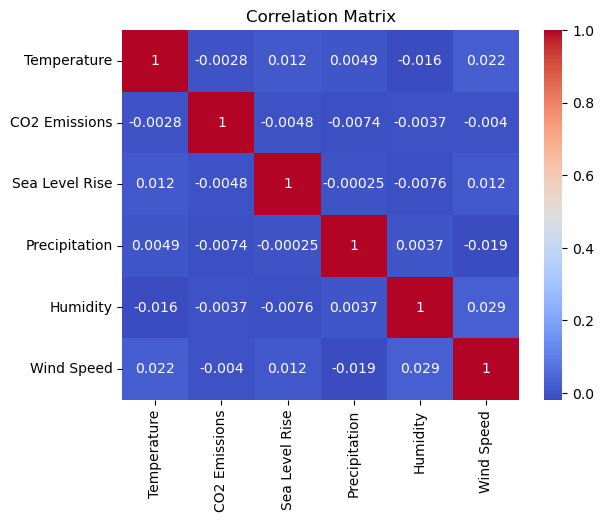

In [17]:
# Correlation matrix heatmap
corr = raw_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

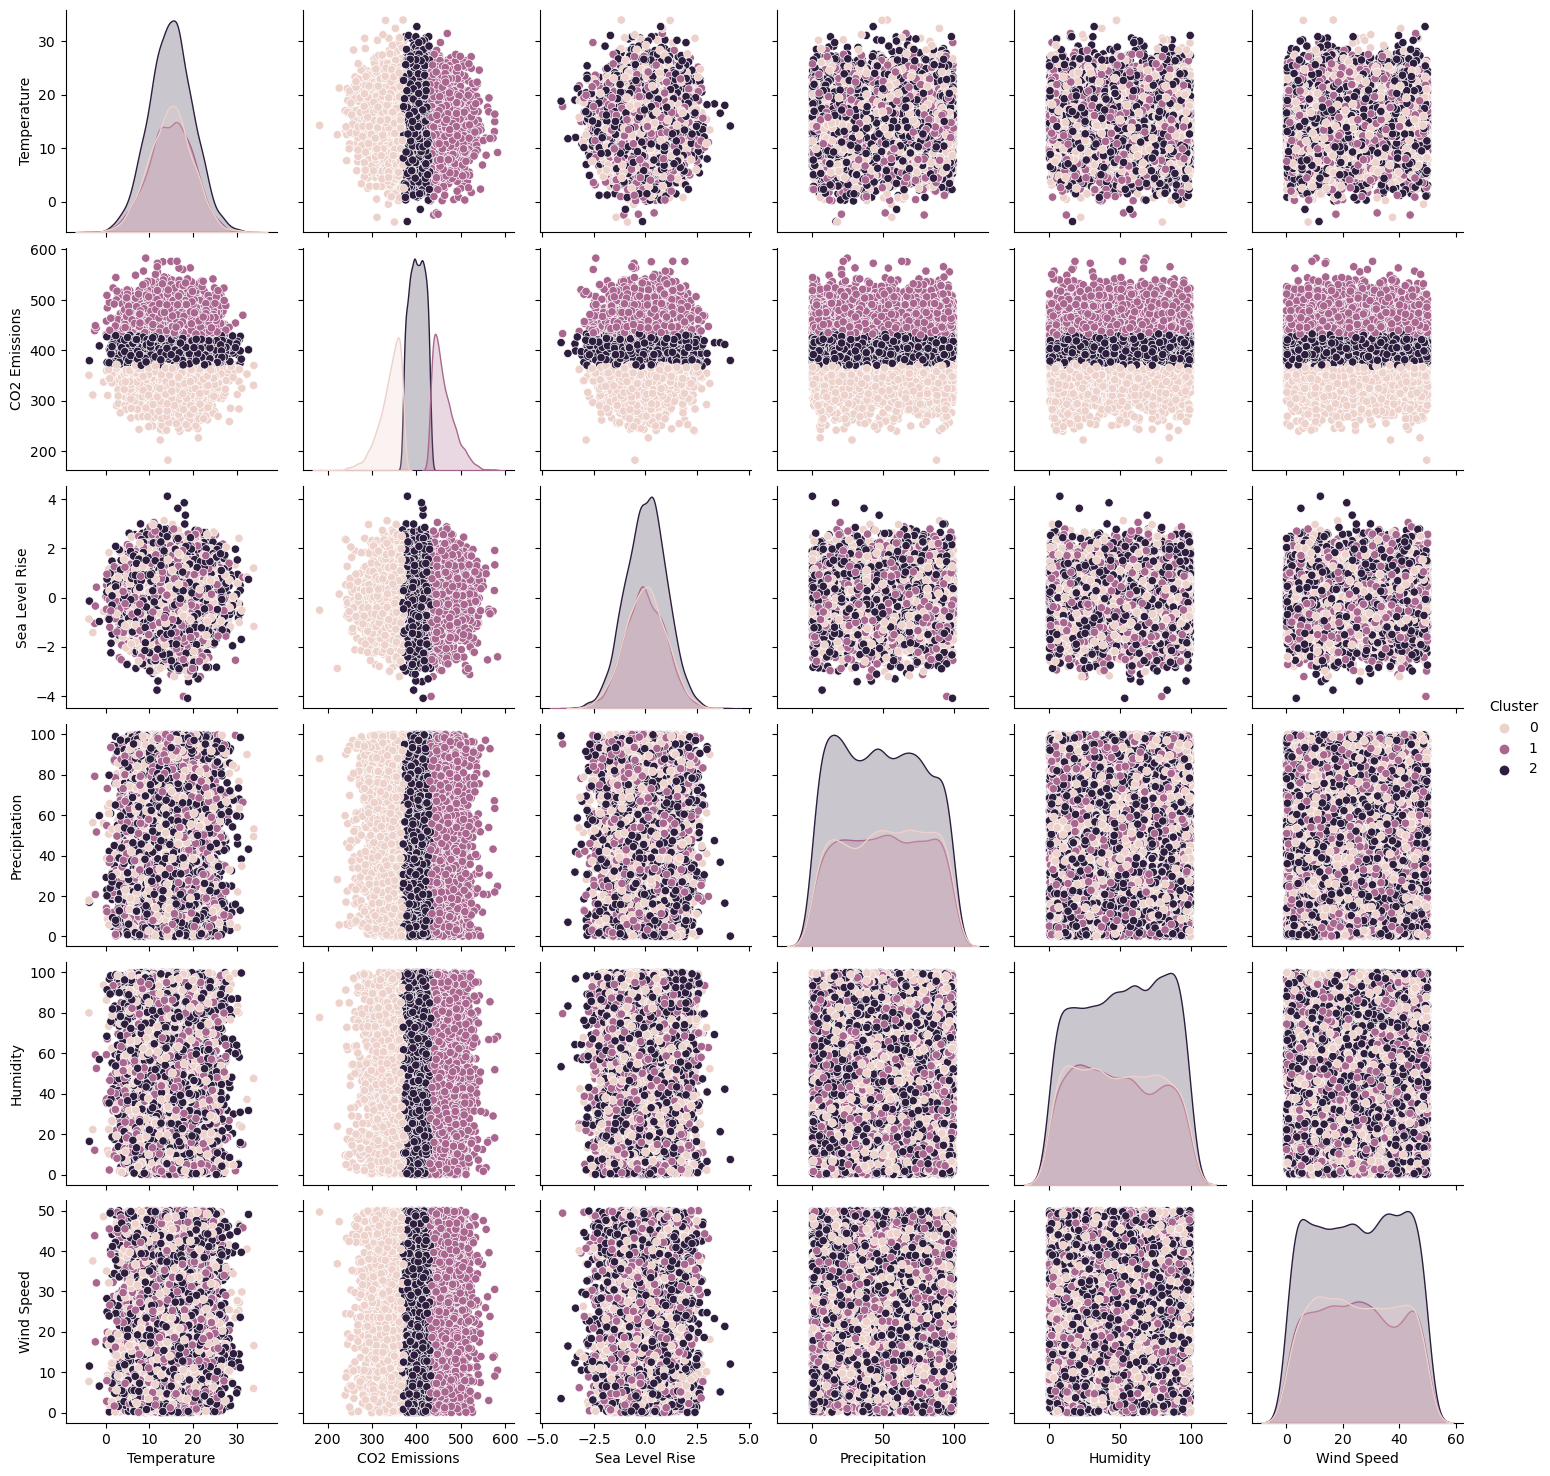

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
features = raw_df[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']]
raw_df['Cluster'] = kmeans.fit_predict(features)
sns.pairplot(raw_df, hue='Cluster')
plt.show()

## Model Development

In [19]:
X = df.drop(columns=['CO2 Emissions'])
y = df['CO2 Emissions']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

tree_regressor = DecisionTreeRegressor(random_state=50)
tree_regressor.fit(X_train, y_train)

# make predictions on the testing data
y_pred = tree_regressor.predict(X_test)

In [22]:
# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 4774.5665916783455
Mean Absolute Error: 54.773719135
Mean Absolute Percentage Error: 0.14042730574393497


## Performance Tuning

In [23]:
# Define lists of hyperparameter values to iterate over
splitter = ['best', 'random']
max_features_values = ['sqrt', 'log2', None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
min_samples_leaf_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
max_depth_values = [2, 4, 6 , 8, 10, 12, 14, 16]

In [24]:
results_run1 = []
results_run2 = []
results_run3 = []
results_run4 = []

In [25]:
# Run 1: Varying Split Criteria only
for split_criteria in splitter:
    # Initialize and train the Decision Tree Classifier with current hyperparameters
    clf = DecisionTreeRegressor(splitter=split_criteria, random_state=50)
    clf.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = clf.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
        # Append results for Run 1
    results_run1.append({
        'Splitter': split_criteria,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'Mean Absolute Percentage Error': mape
    })
df_run1 = pd.DataFrame(results_run1)

In [26]:
df_run1

Splitter  Mean Squared Error  Mean Absolute Error  \
0     best         4774.566592            54.773719   
1   random         4654.945324            54.285460   

   Mean Absolute Percentage Error  
0                        0.140427  
1                        0.139840

In [27]:
# Run 2: Max Features
for max_features_value in max_features_values:
    # Initialize and train the Decision Tree Classifier with current hyperparameters
    clf = DecisionTreeRegressor(splitter='random', max_features=max_features_value, random_state=50)
    clf.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = clf.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
        # Append results for Run 2
    results_run2.append({
        'Max Features': max_features_value,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'Mean Absolute Percentage Error': mape
    })
df_run2 = pd.DataFrame(results_run2)

In [28]:
df_run2

Max Features  Mean Squared Error  Mean Absolute Error  \
0         sqrt         5169.260030            57.163661   
1         log2         4838.419508            55.715701   
2         None         4654.945324            54.285460   
3          0.3         4766.568185            54.444511   
4          0.4         4765.696799            55.138757   
5          0.5         4578.971608            53.464961   
6          0.6         4551.460639            52.960057   
7          0.7         4568.612101            53.792465   
8          0.8         4704.925429            54.215528   

   Mean Absolute Percentage Error  
0                        0.146624  
1                        0.143080  
2                        0.139840  
3                        0.139551  
4                        0.141629  
5                        0.137484  
6                        0.136231  
7                        0.138425  
8                        0.139240

In [29]:
# Run 3: Min Samples Leaf
for min_samples_leaf_value in min_samples_leaf_values:
    # Initialize and train the Decision Tree Classifier with current hyperparameters
    clf = DecisionTreeRegressor(splitter='random', max_features=None, min_samples_leaf=min_samples_leaf_value, random_state=50)
    clf.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = clf.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
        # Append results for Run 3
    results_run3.append({
        'Min Samples Leaf': min_samples_leaf_value,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'Mean Absolute Percentage Error': mape
    })
df_run3 = pd.DataFrame(results_run3)

In [30]:
df_run3

Min Samples Leaf  Mean Squared Error  Mean Absolute Error  \
0               100         2535.828039            40.056055   
1               200         2515.079685            39.912217   
2               300         2512.384960            39.829890   
3               400         2509.856700            39.855660   
4               500         2511.719495            39.849555   
5               600         2506.365189            39.784350   
6               700         2506.524876            39.788539   
7               800         2505.918114            39.783226   
8               900         2505.918114            39.783226   
9              1000         2505.922556            39.783753   

   Mean Absolute Percentage Error  
0                        0.103509  
1                        0.103168  
2                        0.102971  
3                        0.103025  
4                        0.103020  
5                        0.102854  
6                        0.102863  
7                        0.102849  
8                        0.102849  
9                        0.102851

In [31]:
# Run 4: Max Depth
for max_depth_value in max_depth_values:
    # Initialize and train the Decision Tree Classifier with current hyperparameters
    clf = DecisionTreeRegressor(splitter='random', max_features=None, min_samples_leaf=min_samples_leaf_value, max_depth=max_depth_value, random_state=50)
    clf.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = clf.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
        # Append results for Run 4
    results_run4.append({
        'Max Depth': max_depth_value,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'Mean Absolute Percentage Error': mape
    })
df_run4 = pd.DataFrame(results_run4)

In [32]:
df_run4

Max Depth  Mean Squared Error  Mean Absolute Error  \
0          2         2506.479896            39.785815   
1          4         2505.922556            39.783753   
2          6         2505.922556            39.783753   
3          8         2505.922556            39.783753   
4         10         2505.922556            39.783753   
5         12         2505.922556            39.783753   
6         14         2505.922556            39.783753   
7         16         2505.922556            39.783753   

   Mean Absolute Percentage Error  
0                        0.102857  
1                        0.102851  
2                        0.102851  
3                        0.102851  
4                        0.102851  
5                        0.102851  
6                        0.102851  
7                        0.102851

In [33]:
# final model
final_clf = DecisionTreeRegressor(splitter='random', max_features=None, min_samples_leaf=min_samples_leaf_value, random_state=50)
final_clf.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=1000, random_state=50, splitter='random')

[Text(0.4, 0.875, 'x[4] <= 7.61\nsquared_error = 2454.725\nsamples = 7000\nvalue = 400.425'),
 Text(0.2, 0.625, 'squared_error = 2262.96\nsamples = 1069\nvalue = 402.52'),
 Text(0.6, 0.625, 'x[2] <= 79.01\nsquared_error = 2488.356\nsamples = 5931\nvalue = 400.048'),
 Text(0.4, 0.375, 'x[0] <= 18.645\nsquared_error = 2446.207\nsamples = 4683\nvalue = 399.843'),
 Text(0.2, 0.125, 'squared_error = 2429.819\nsamples = 3592\nvalue = 399.69'),
 Text(0.6, 0.125, 'squared_error = 2499.829\nsamples = 1091\nvalue = 400.349'),
 Text(0.8, 0.375, 'squared_error = 2645.768\nsamples = 1248\nvalue = 400.816')]

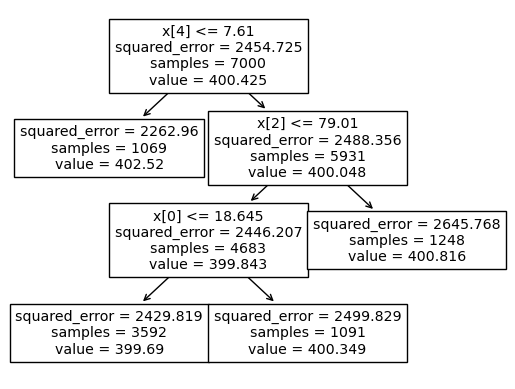

In [34]:
from sklearn.tree import plot_tree
plot_tree(final_clf)

In [35]:
# Define the information for the new individual
new_data = {
    'Country': input("Enter Country: "),
    'Temperature': float(input("Enter Temperature: ")),
    'Sea Level Rise': float(input("Enter Sea Level Rise: ")),
    'Precipitation': float(input("Enter Precipitation: ")),
    'Humidity': float(input("Enter Humidity: ")),
    'Wind Speed': float(input("Enter Wind Speed: ")),
}

# Create a DataFrame with the new individual's information
new_df = pd.DataFrame([new_data])

Enter Country:  Afghanistan
Enter Temperature:  10
Enter Sea Level Rise:  1
Enter Precipitation:  20
Enter Humidity:  20
Enter Wind Speed:  20


In [46]:
# One-hot encode the "Country" column
new_df_encoded = pd.get_dummies(new_df['Country'], prefix='Country')
new_df_encoded

# Ensure all columns are present in the encoded DataFrame
missing_cols = set(oh_encoder.get_feature_names_out(['Country'])) - set(new_df_encoded.columns)
for col in missing_cols:
    new_df_encoded[col] = 0

# Reorder columns to match the original encoding
new_df_encoded = new_df_encoded[oh_encoder.get_feature_names_out(['Country'])]

# Final DataFrame
final_df = new_df.drop(columns=['Country']).join(new_df_encoded)
final_df

Temperature  Sea Level Rise  Precipitation  Humidity  Wind Speed  \
0         10.0             1.0           20.0      20.0        20.0   

   Country_Afghanistan  Country_Albania  Country_Algeria  \
0                 True                0                0   

   Country_American Samoa  Country_Andorra  ...  Country_Uruguay  \
0                       0                0  ...                0   

   Country_Uzbekistan  Country_Vanuatu  Country_Venezuela  Country_Vietnam  \
0                   0                0                  0                0   

   Country_Wallis and Futuna  Country_Western Sahara  Country_Yemen  \
0                          0                       0              0   

   Country_Zambia  Country_Zimbabwe  
0               0                 0  

[1 rows x 248 columns]

In [47]:
# Use the trained model to make predictions
prediction = final_clf.predict(final_df)

# Print the predicted income category
print("Predicted CO2 Emissions:", prediction[0])

Predicted CO2 Emissions: 399.68957274312294
